# Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import pandas as pd
from mpl_toolkits.basemap import Basemap
from osgeo import gdal
import os
from netCDF4 import Dataset
import gloce as gc
from scipy.stats import gaussian_kde
from scipy import stats
import random
import scipy.stats as ss
import scipy
import time
from matplotlib import font_manager
from matplotlib import rcParams
from brokenaxes import brokenaxes
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
yr_all = np.array([ 2015, 2016, 2017, 2018, 2019, 2020, 2021])
fig_title=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)']
from matplotlib.mathtext import _mathtext as mathtext
mathtext.FontConstantsBase.sup1 = 0.45
font = {'family':  'sans-serif',
        'sans-serif': 'Arial',
        'weight': 'normal',
        'size': 20}
plt.rc('font', **font)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
lw_contry = 0.5
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['mathtext.rm'] = 'Arial'

In [3]:
#-----------------------------------------------------------------------------------------
pathin='/home/liwei/WORK/lzhu/edge_dynamic/data_in/'# replace with your own path
#-----------------------------------------------------------------------------------------
mask1 = np.load(pathin+'mask1_amazon.npy')
mask025 = np.load(pathin+'mask025.npy')

# Figure 1

In [4]:
edge_frac = np.load(pathin+'smy_edge025.npy')[:,80*4:110*4,100*4:137*4]
area = gc.globalarea(0.25)
area = area[80*4:110*4,100*4:137*4]
smy_ef = np.zeros((9,34))
for i in range(9):
    tem = np.copy(mask025[80*4:110*4,100*4:137*4])
    tem[tem!=i+1]=0
    tem[tem==i+1]=1
    smy_ef[i] = np.nansum(edge_frac*area*tem,(1,2))/10000
smy_age = np.load(pathin+'Edge_age_smy_2023.npy')[80*4:110*4,100*4:137*4]
smy_age = smy_age*gc.downscaling(mask1[80:110,100:137],4,4)
edge_frac0 = edge_frac[-1]#edge fraction for 2023
edge_frac1 = gc.upscaling(edge_frac0,4,4,np.nanmean)
smy_country_age =  np.zeros((9,30*4,37*4))
smy_country_age_weight = np.zeros((9,30*4,37*4))
for i in range(9):
    tem = np.copy(mask025[80*4:110*4,100*4:137*4])
    tem[tem!=i+1]=np.nan
    tem[tem==i+1]=1
    smy_country_age[i] = smy_age*tem
    smy_country_age_weight[i] = edge_frac0*tem
    smy_country_age_weight[i,np.isnan(smy_country_age[i])]=np.nan
smy_reg = np.load(pathin+'smy_reg_251110.npy')#(2,2,180,360) 2 para 2: mean std

Text(-0.15, 1.03, '(d)')

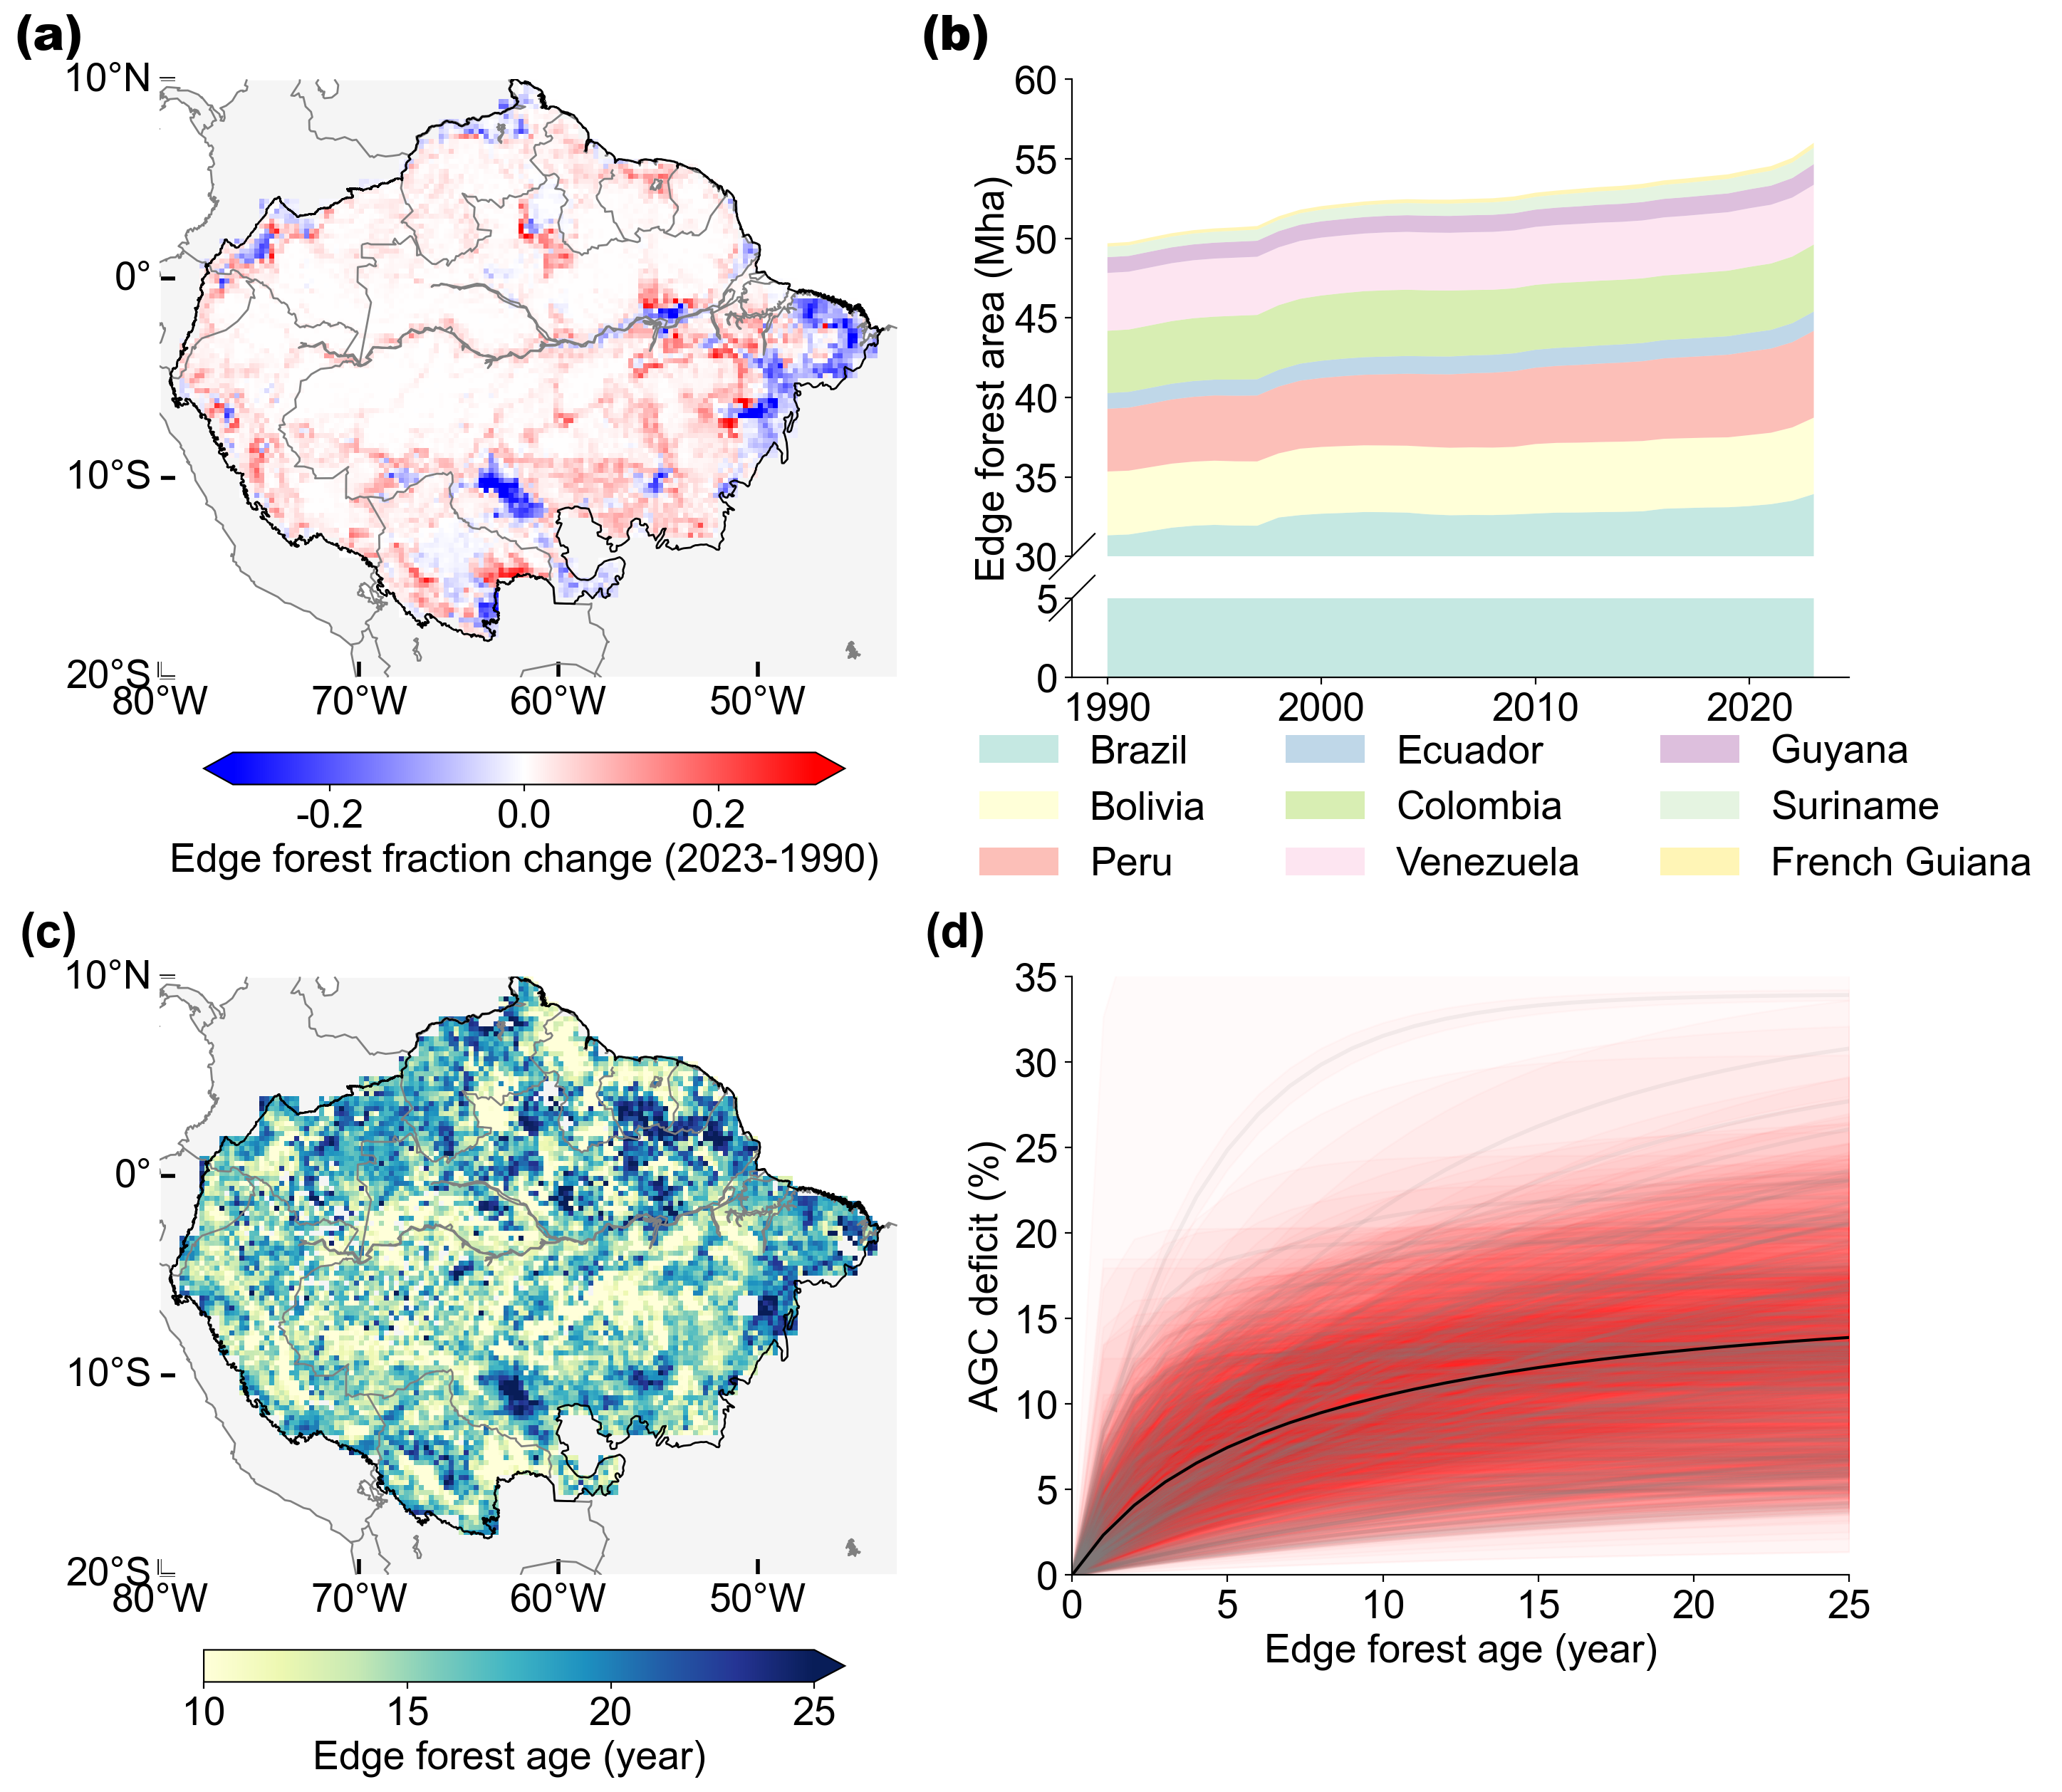

In [5]:
years = np.arange(1990, 2024)  # 34 years
lw_contry=1
lon_w=-80;lon_e=-43
lat_s=-20;lat_n=10
countries = [
    'Brazil', 'Bolivia', 'Peru','Ecuador',  'Colombia', 'Venezuela', 
    'Guyana', 'Suriname', 'French Guiana']
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(wspace=0.2,hspace=0.5, right=0.9,left = 0.1,bottom =0.2,top=0.9)
gs = gridspec.GridSpec(2,2, figure=fig)
ax = brokenaxes(ylims=((0, 5), (30, 60)),subplot_spec=gs[0,1], hspace=.15) 
number = 9
cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
ax.stackplot(years, smy_ef, labels=countries,colors=colors,alpha=0.5)
ax.legend(loc=(-0.14,-0.37),frameon=False,ncol=3)#
ax.set_ylabel('Edge forest area (Mha)')
ax.set_title(fig_title[1],x=-0.15,y=1.03,weight=1000)
#--------------------
ax = fig.add_subplot(gs[0,0])
m = Basemap(llcrnrlon=lon_w,llcrnrlat=lat_s,urcrnrlon=lon_e,urcrnrlat=lat_n,resolution='l')
file = m.readshapefile(pathin+'Amazon_biome',"Shp",default_encoding='gbk',color="black",linewidth=1, zorder=80)
m.drawcountries(linewidth=lw_contry, color='grey',  zorder=60) 
m.drawcoastlines(linewidth=lw_contry, color='grey',  zorder=70)
m.fillcontinents(color = 'whitesmoke', lake_color = 'white')
m.drawmapboundary(linewidth=1,color='white',fill_color = 'white')
tem = edge_frac[-1]-edge_frac[0]
tem[np.isnan(mask025[80*4:110*4,100*4:137*4])]=np.nan
im = m.imshow(tem,cmap='bwr',vmin=-0.3,vmax=0.3,origin='upper',zorder=30)
parallels = np.arange(lat_s, lat_n+1, 10.) # 这两行画纬度，范围为[-90,90]间隔为10
lat_dict=m.drawparallels(parallels,labels=[True, False, False, False],color='none',xoffset=None)
meridians = np.arange(lon_w,lon_e+1,10.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='none',xoffset=None)
plt.yticks(parallels,len(parallels)*[''])
plt.xticks(meridians,len(meridians)*[''])
ax.tick_params(direction='in',width=2,length=8)
ax.set_title(fig_title[0],x=-0.15,y=1.03,weight=1000)
cbar_ax = plt.gcf().add_axes([0.13, 0.57, 0.3, 0.015])#left , bottom,wide, height
cb = plt.colorbar(im,cax=cbar_ax,orientation = 'horizontal',extend='both')
cb.set_label('Edge forest fraction change (2023-1990)')
#----------------------------------------------------
ax = fig.add_subplot(gs[1,0])
m = Basemap(llcrnrlon=lon_w,llcrnrlat=lat_s,urcrnrlon=lon_e,urcrnrlat=lat_n,resolution='l')
file = m.readshapefile(pathin+'Amazon_biome',"Shp",default_encoding='gbk',color="black",linewidth=1, zorder=80)
m.drawcountries(linewidth=lw_contry, color='grey',  zorder=60) 
m.drawcoastlines(linewidth=lw_contry, color='grey',  zorder=70)
m.fillcontinents(color = 'whitesmoke', lake_color = 'white')
m.drawmapboundary(linewidth=1,color='white',fill_color = 'white')
im = m.imshow(smy_age,cmap='YlGnBu',vmin=10,vmax=25,origin='upper',zorder=30)
parallels = np.arange(lat_s, lat_n+1, 10.) # 这两行画纬度，范围为[-90,90]间隔为10
lat_dict=m.drawparallels(parallels,labels=[True, False, False, False],color='none',xoffset=None)
meridians = np.arange(lon_w,lon_e+1,10.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='none',xoffset=None)
plt.yticks(parallels,len(parallels)*[''])
plt.xticks(meridians,len(meridians)*[''])
ax.tick_params(direction='in',width=2,length=8)
cbar_ax = plt.gcf().add_axes([0.13, 0.15, 0.3, 0.015])#left , bottom,wide, height
cb = plt.colorbar(im,cax=cbar_ax,orientation = 'horizontal',extend='max')
cb.set_label('Edge forest age (year)')
ax.set_title(fig_title[2], x=-0.15, y=1.03,weight='bold')
#-----------------------------------------------------
def func(p,x): 
    a,b=p
    return a*(1-np.e**(x/b))
ax = fig.add_subplot(gs[1,1])
xx = np.arange(0,26,1)
tem = smy_reg[0,0]
lalo = np.where(tem<0)
n = gc.nanravel(tem).shape[0]
yy = np.zeros((n,26))
weights = np.zeros((n,1))
for i in range(n):
    a = -smy_reg[0,0,lalo[0][i],lalo[1][i]]
    a_sd = smy_reg[0,1,lalo[0][i],lalo[1][i]]
    b = smy_reg[1,0,lalo[0][i],lalo[1][i]]
    b_sd = smy_reg[1,1,lalo[0][i],lalo[1][i]]
    a0 = a-a_sd;a0 = np.max([a0,0.01])
    b0 = b+b_sd;b0 = np.min([b0,-0.01])
    a1 = a+a_sd;a1 = np.max([a1,0.01])
    b1 = b-b_sd;b1 = np.min([b1,-0.01])
    ax.fill_between(x=xx,y1=func([a0,b1],xx)*100,
                    y2=func([a1,b0],xx)*100,color='red',alpha=0.02)
    weights[i,0] = edge_frac1[lalo[0][i]-80,lalo[1][i]-100]
    yy[i] = func([a,b],xx)*100
    ax.plot(xx,yy[i],lw=2,color='grey',alpha=0.1,ls='-')
ax.plot(xx,np.mean(yy*weights,0)/np.mean(weights),color='black')
ax.set_xlim(0,25)
ax.set_ylim(0,35)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('AGC deficit (%)')
ax.set_xlabel('Edge forest age (year)')
ax.set_title(fig_title[3], x=-0.15, y=1.03,weight='bold')

# Figure 2

In [6]:
smy_degradation = np.load(pathin+'smy_degradation.npy')
smy_deforestation = np.load(pathin+'smy_deforestation.npy')
smy_mean = np.zeros((10,123))
smy_mean_d = np.zeros((10,123))
smy_std = np.zeros((123))
for i in range(123):
    smy_mean[:,i] = np.nansum(smy_degradation[:,i],(1,2))
    smy_mean_d[:,i] = np.nansum(smy_deforestation[:,i],(1,2))
smy_std = np.nanstd(smy_mean,0)
smy_mean0 = np.nanmean(smy_mean,0)
smy_mean_d0 = np.nanmean(smy_mean_d,0)

smy_degradation_pool = np.load(pathin+'smy_degradation_pool_19012023.npy')[0]#(3, 10, 3, 30, 37)3 all clim co2; 10 simulations; 3 AGC BGC Soil&litter
smy_deforestation_pool = np.load(pathin+'smy_deforestation_pool_19012023.npy')[0]#(3, 10, 3, 30, 37)
degradation_pool = np.zeros((2,3))
degradation_pool[:] = np.nan
deforestation_pool = np.zeros((2,3))
deforestation_pool[:] = np.nan
degradation_pool[0] = np.mean(np.nansum(smy_degradation_pool,(2,3)),0)/1000
degradation_pool[1] = np.std(np.nansum(smy_degradation_pool,(2,3)),0, ddof=1)/1000
deforestation_pool[0] = np.mean(np.nansum(smy_deforestation_pool,(2,3)),0)/1000
e_deg = np.nansum(smy_degradation_pool,(2,3))
e_def = np.nansum(smy_deforestation_pool,(2,3))
smy_map = np.zeros((2,30,37))
smy_map[0] = np.nansum(smy_degradation_pool,(0,1))/10
smy_map[1] = np.nansum(smy_deforestation_pool,(0,1))/10
smy_map[:,np.isnan(mask1[80:110,100:137])]=np.nan

smy_degradation025 = np.zeros((10,123,30*4,37*4))
smy_deforestation025 = np.zeros((10,123,30*4,37*4))
for j in range(10):
    for i in range(123):
        smy_degradation025[j,i] = gc.downscaling(smy_degradation[j,i],4,4)/16
        smy_deforestation025[j,i] = gc.downscaling(smy_deforestation[j,i],4,4)/16
smy_mean_degradation = np.zeros((9,123))
smy_mean_deforestation = np.zeros((9,123))
for i in range(9):
    tem = np.copy(mask025[80*4:110*4,100*4:137*4])
    tem[tem!=i+1]=0
    tem[tem==i+1]=1
    for j in range(123):
        smy_mean_degradation[i,j] = np.nansum(np.nanmean(smy_degradation025[:,j],0)*tem)
        smy_mean_deforestation[i,j] = np.nansum(np.nanmean(smy_deforestation025[:,j],0)*tem)

/tmp/ipykernel_110043/2614606090.py:42: RuntimeWarning: Mean of empty slice
  smy_mean_degradation[i,j] = np.nansum(np.nanmean(smy_degradation025[:,j],0)*tem)
/tmp/ipykernel_110043/2614606090.py:43: RuntimeWarning: Mean of empty slice
  smy_mean_deforestation[i,j] = np.nansum(np.nanmean(smy_deforestation025[:,j],0)*tem)


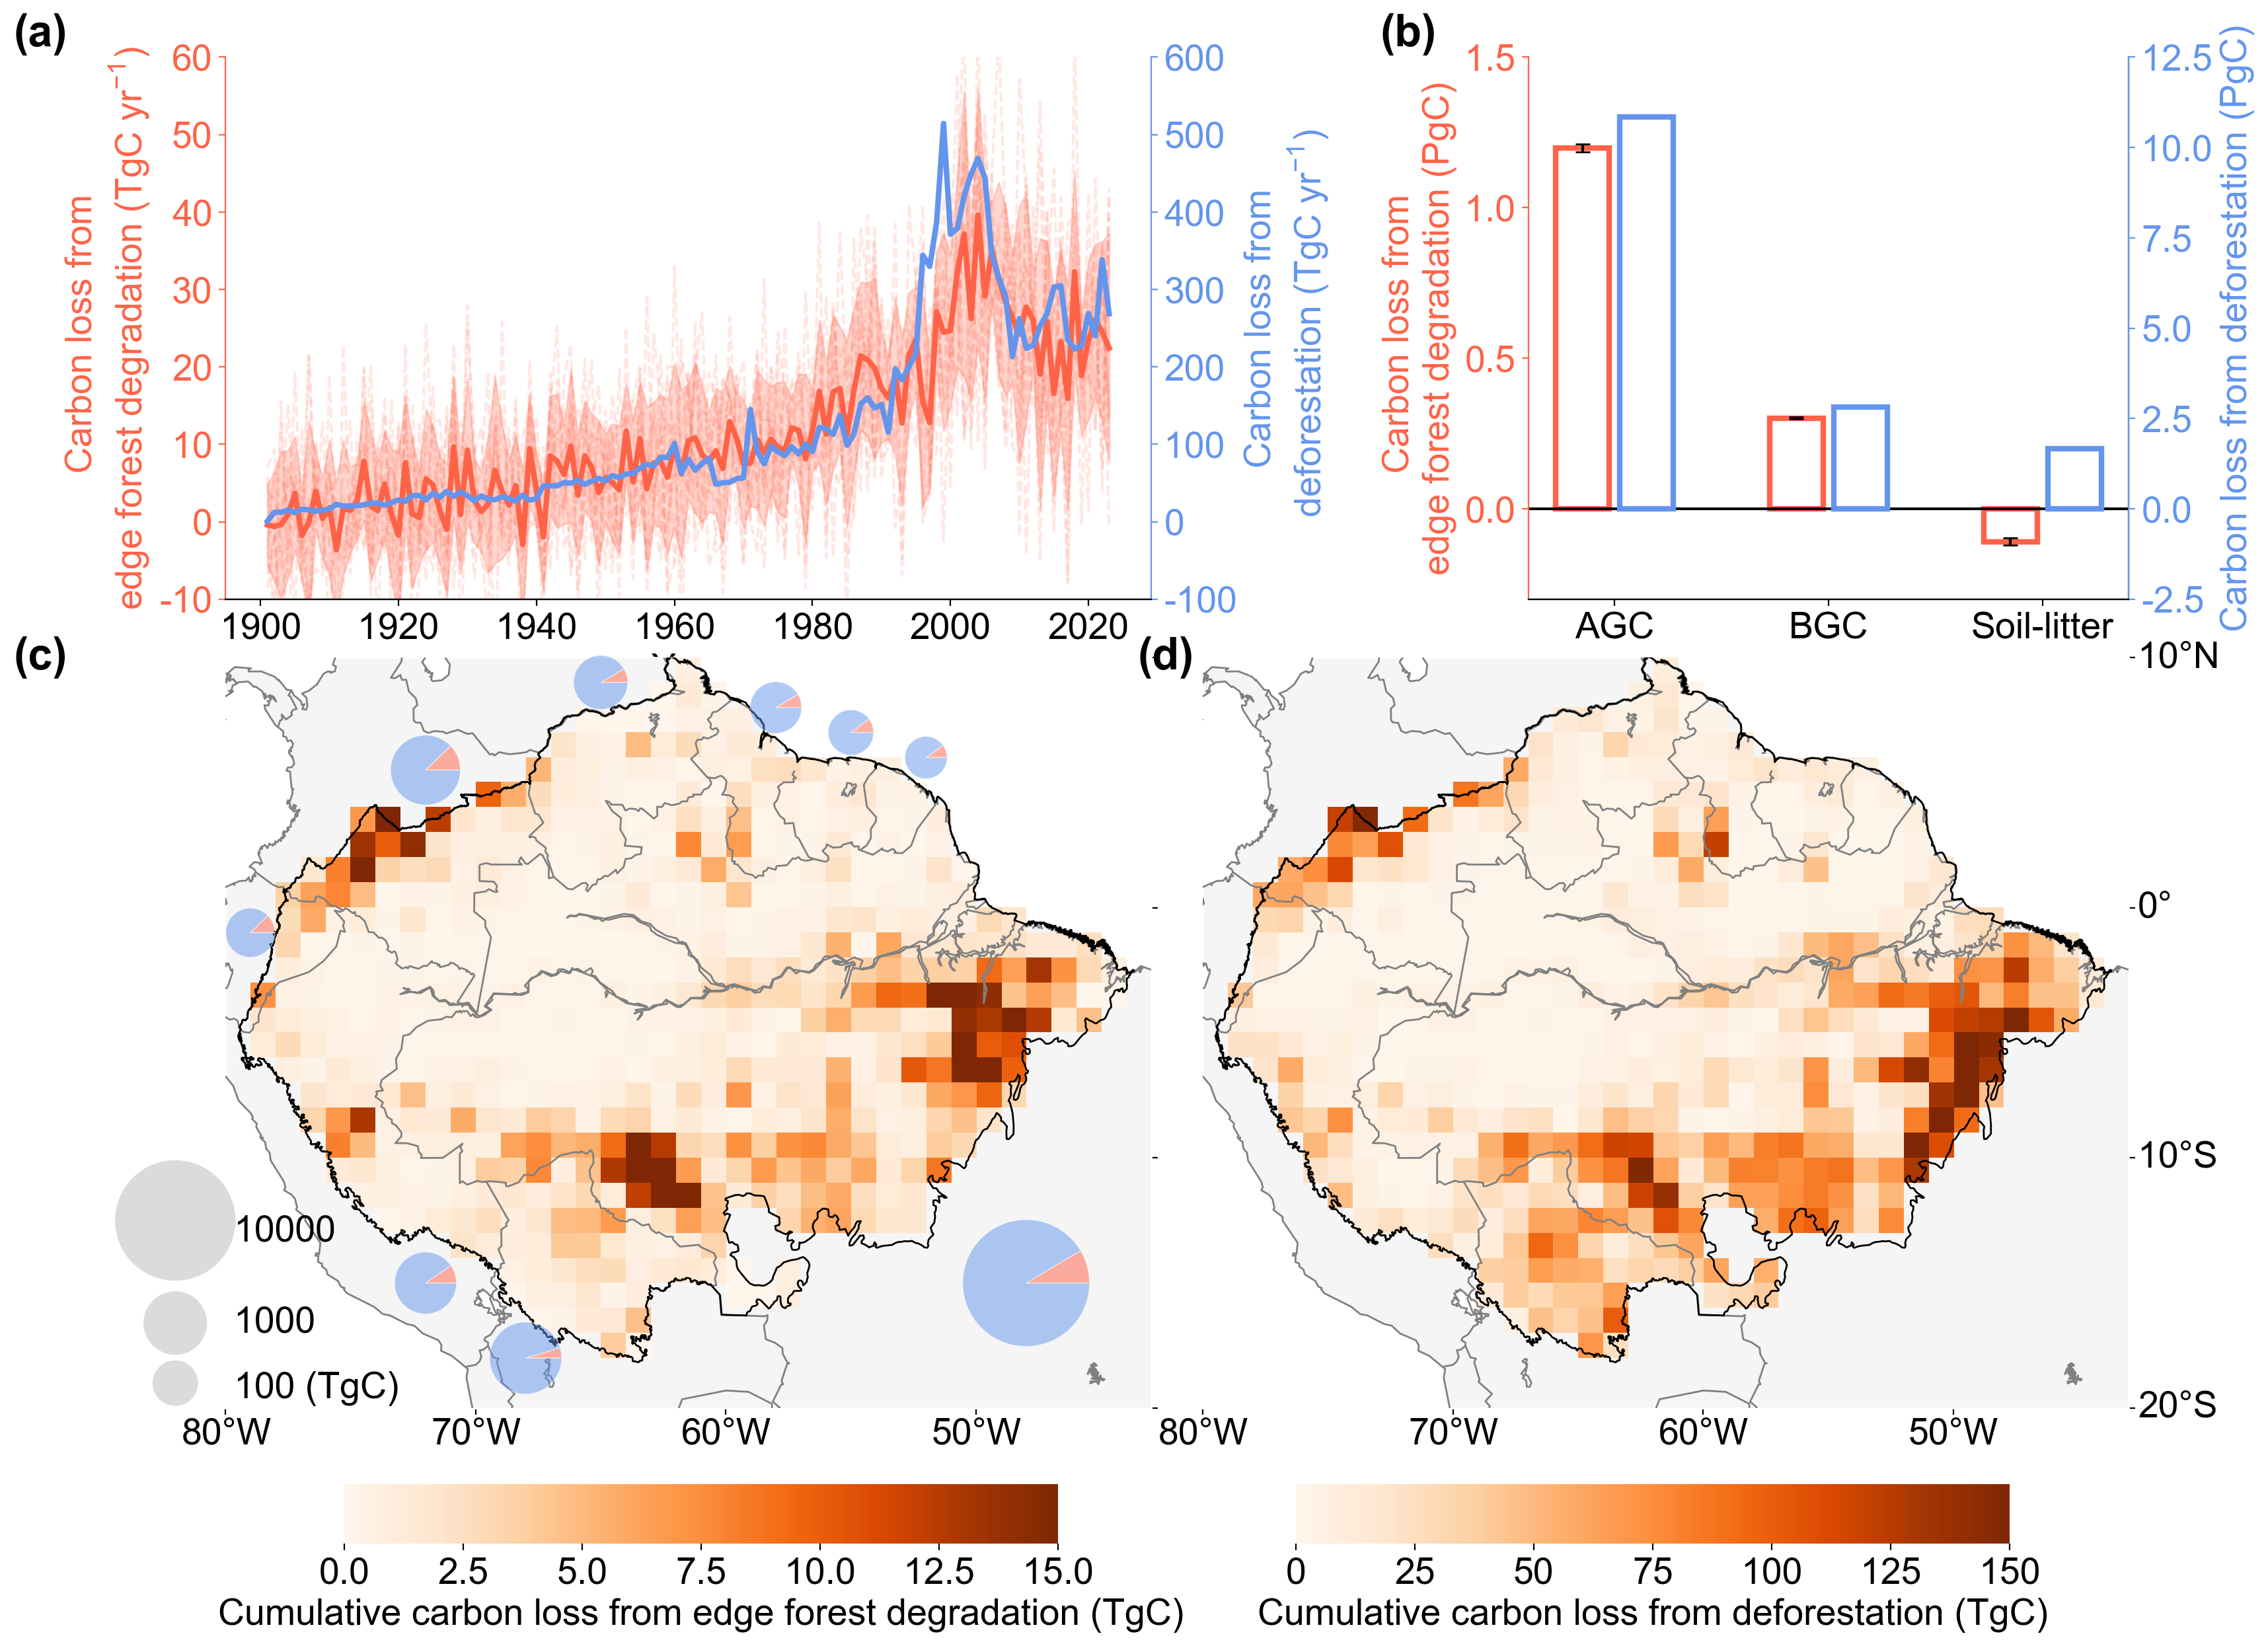

In [7]:
lon_w=-80;lon_e=-43
lat_s=-20;lat_n=10
lw_contry = 1
fig = plt.figure(figsize=(18,15))
fig.subplots_adjust(wspace=0.9,hspace=0.3, right=0.9,left = 0.1,bottom =0.2,top=0.9)
gs = gridspec.GridSpec(15,18, figure=fig) 
#-----------------------------------------------------------------------------------------------
ax = fig.add_subplot(gs[0:6,0:9])
ax.set_title(fig_title[0], x=-0.2, y=1,weight='bold')
xx = np.arange(1901,2024,1)
c_degr = 'tomato'
c_def = 'cornflowerblue'
lw=3
for i in range(10):
    ax.plot(xx,smy_mean[i,0:],c=c_degr,alpha=0.15,ls='--')
ax.plot(xx,smy_mean0[0:],c=c_degr,alpha=1,lw=lw)
ax.fill_between(x=xx,y1=smy_mean0[0:]-smy_std[0:],
                y2=smy_mean0[0:]+smy_std[0:],color=c_degr,alpha=0.25)
ax.set_ylabel('Carbon loss from \nedge forest degradation (TgC yr$\mathrm{^{-1}}$)',c=c_degr)
ax.set_xlabel('Year')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-10,60)
ax.spines['left'].set_color(c_degr)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', colors=c_degr)
ax2 = ax.twinx()
ax2.plot(xx,smy_mean_d0[0:],c=c_def,alpha=1,lw=lw)
ax2.set_ylim(-100,600)
ax2.set_ylabel('Carbon loss from\n deforestation (TgC yr$\mathrm{^{-1}}$)',c=c_def)
ax2.spines['right'].set_color(c_def)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='y', colors=c_def)
#-----------------------------------------------------------------------------------------------
ax = fig.add_subplot(gs[0:6,12:18])
ax.set_title(fig_title[1], x=-0.2, y=1,weight='bold')
xx = np.arange(0,3,1)
ax.bar(xx,degradation_pool[0,:],yerr = degradation_pool[1,:],fc='white',edgecolor=c_degr,linewidth=3,alpha=1,width=0.25,capsize=4)
ax.set_xticks(xx+0.15)
ax.set_xticklabels(['AGC','BGC','Soil-litter'])
ax.axhline(0,c='black')
ax.set_ylabel('Carbon loss from \nedge forest degradation (PgC)',c=c_degr)
ax.set_ylim(-0.3,1.500)
ax.spines['left'].set_color(c_degr)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', colors=c_degr)
ax2 = ax.twinx()
ax2.bar(xx+0.3,deforestation_pool[0,:],fc='white',edgecolor=c_def,linewidth=3,alpha=1,width=0.25,capsize=4)
ax2.set_ylim(-2.500,12.50)
ax2.set_ylabel('Carbon loss from deforestation (PgC)',c=c_def)
ax2.spines['right'].set_color(c_def)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='y', colors=c_def)
#-----------------------------------------------------------------------------------------------
ax = fig.add_subplot(gs[6:15,0:9])
ax.set_title(fig_title[2], x=-0.2, y=0.97,weight='bold')
m = Basemap(llcrnrlon=lon_w,llcrnrlat=lat_s,urcrnrlon=lon_e,urcrnrlat=lat_n,resolution='l')
file = m.readshapefile(pathin+'Amazon_biome',
                       "Shp",default_encoding='gbk',color="black",linewidth=1, zorder=80)
m.drawcountries(linewidth=lw_contry, color='grey',  zorder=60) 
m.drawcoastlines(linewidth=lw_contry, color='grey',  zorder=70)
m.fillcontinents(color = 'whitesmoke', lake_color = 'white')
m.drawmapboundary(linewidth=1,color='white',fill_color = 'white')
im = m.imshow(smy_map[0], cmap='Oranges', vmin=0, vmax=15, origin='upper', zorder=30)
parallels = np.arange(lat_s, lat_n+1, 10.)
meridians = np.arange(lon_w,lon_e+1,10.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='none',xoffset=None)
plt.yticks(parallels,len(parallels)*[''])
plt.gca().yaxis.tick_right()
plt.xticks(meridians,len(meridians)*[''])

countries = ['Brazil', 'Bolivia', 'Peru', 'Ecuador', 'Colombia',
    'Venezuela', 'Guyana', 'Suriname', 'French Guiana']
edge_data = np.sum(smy_mean_degradation[:,0:],1)
emission_data = np.sum(smy_mean_deforestation[:,0:],1)
# country_data:  [edge, emission]
country_data = {c: [edge, emi] for c, edge, emi in zip(countries, edge_data, emission_data)}
country_emission = {c: edge + emi for c, edge, emi in zip(countries, edge_data, emission_data)}

country_coords = {
    'Brazil': (-48, -15),
    'Bolivia': (-68, -18),
    'Peru': (-72, -15),
    'Ecuador': (-79, -1),
    'Colombia': (-72, 5.5),
    'Venezuela': (-65, 9),
    'Guyana': (-58, 8),
    'Suriname': (-55, 7),
    'French Guiana': (-52, 6),
}

# ----------------- pie plot -----------------
emissions = np.array([country_emission[c] for c in countries])
emin, emax = emissions.min(), emissions.max()
min_size, max_size = 0.4, 1.2

for cname in countries:
    lon, lat = country_coords[cname]
    x, y = m(lon, lat)
    val = country_emission[cname]
    pie_size = min_size + (np.sqrt(val) - np.sqrt(emin)) / (np.sqrt(emax) - np.sqrt(emin)) * (max_size - min_size)
    ax_in = inset_axes(ax,
                       width=pie_size, height=pie_size,
                       loc='center',
                       bbox_to_anchor=(x, y),
                       bbox_transform=ax.transData,
                       borderpad=0)
    ax_in.pie(country_data[cname],
              colors=[c_degr,c_def],
              wedgeprops=dict(linewidth=0.5, edgecolor='white',alpha=0.5))
    ax_in.set_aspect('equal')
    ax_in.set_xticks([]); ax_in.set_yticks([])
    for s in ax_in.spines.values():
        s.set_visible(False)
# ----------------- legend -----------------
legend_ax = fig.add_axes([0.112, 0.22, 0.15, 0.25])#[left, bottom, width, height]
legend_ax.axis("off")
legend_ax.set_aspect('equal')
legend_vals = [100, 1000, 10000]
x_lon = -82
legend_coords = [[x_lon,-19],[x_lon,-16.6],[x_lon,-12.5]]
yl = [0.2,1.,2.1]
for i in range(3):
    lon, lat = legend_coords[i]
    x, y = m(lon, lat)
    val = legend_vals[i]
    pie_size = min_size + (np.sqrt(val) - np.sqrt(emin)) / (np.sqrt(emax) - np.sqrt(emin)) * (max_size - min_size)
    ax_in = inset_axes(ax,width=pie_size, height=pie_size,loc='center',bbox_to_anchor=(x, y), bbox_transform=ax.transData, borderpad=0)
    ax_in.pie([1],
              colors=['lightgrey'],
              wedgeprops=dict(linewidth=0.5, edgecolor='white',alpha=0.8))
    ax_in.set_aspect('equal')
    ax_in.set_xticks([]); ax_in.set_yticks([])
    for s in ax_in.spines.values():
        s.set_visible(False)
    if i==0:
        legend_ax.text(-0.9, yl[i], f"{val:.0f}"+" (TgC)", va="center", fontsize=20)
    else:
        legend_ax.text(-0.9, yl[i], f"{val:.0f}", va="center", fontsize=20)
legend_ax.set_xlim(0, 3)
legend_ax.set_ylim(0, 6)
#-------------------------------------
cbar_ax = plt.gcf().add_axes([0.15, 0.15, 0.3, 0.03])#left, bottom width, height
cb = plt.colorbar(im,cax=cbar_ax,orientation = 'horizontal', extend='neither')
cb.set_label('Cumulative carbon loss from edge forest degradation (TgC)')
cb.outline.set_visible(False)
#--------------------------------------------------------------------------------------------------------------------
ax = fig.add_subplot(gs[6:15,9:18])
ax.set_title(fig_title[3], x=-0.04, y=0.97,weight='bold')
m = Basemap(llcrnrlon=lon_w,llcrnrlat=lat_s,urcrnrlon=lon_e,urcrnrlat=lat_n,resolution='l')
file = m.readshapefile(pathin+'Amazon_biome',
                       "Shp",default_encoding='gbk',color="black",linewidth=1, zorder=80)
m.drawcountries(linewidth=lw_contry, color='grey',  zorder=60) 
m.drawcoastlines(linewidth=lw_contry, color='grey',  zorder=70)
m.fillcontinents(color = 'whitesmoke', lake_color = 'white')
m.drawmapboundary(linewidth=1,color='white',fill_color = 'white')
im = m.imshow(smy_map[1], cmap='Oranges', vmin=0, vmax=150, origin='upper', zorder=30)
parallels = np.arange(lat_s, lat_n+1, 10.)
lat_dict = m.drawparallels(parallels,labels=[False, True, True, True],color='none',xoffset=None)
meridians = np.arange(lon_w,lon_e+1,10.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='none',xoffset=None)
plt.yticks(parallels,len(parallels)*[''])
plt.gca().yaxis.tick_right()
plt.xticks(meridians,len(meridians)*[''])
#-------------------------------------
cbar_ax = plt.gcf().add_axes([0.55, 0.15, 0.3, 0.03])#left, bottom width, height
cb = plt.colorbar(im,cax=cbar_ax,orientation = 'horizontal', extend='neither')
#vertical  'both', 'min', 'max'  ,shrink=0.5
cb.set_label('Cumulative carbon loss from deforestation (TgC)')
cb.outline.set_visible(False)#去除边框

# Figure 3

In [8]:
smy_degradation_pool = -np.load(pathin+'smy_degradation_pool_19012023.npy')[1]#(3, 10, 3, 30, 37)3 all clim co2; 10 simulations; 3 AGC BGC Soil&litter
smy_deforestation_pool = -np.load(pathin+'smy_deforestation_pool_19012023.npy')[1]#(3, 10, 3, 30, 37)
degradation_pool_clim = np.zeros((2,3))
degradation_pool_clim[:] = np.nan
deforestation_pool_clim = np.zeros((2,3))
deforestation_pool_clim[:] = np.nan
degradation_pool_clim[0] = np.mean(np.nansum(smy_degradation_pool,(2,3)),0)
degradation_pool_clim[1] = np.std(np.nansum(smy_degradation_pool,(2,3)),0, ddof=1)
deforestation_pool_clim[0] = np.mean(np.nansum(smy_deforestation_pool,(2,3)),0)

smy_degradation_pool = -np.load(pathin+'smy_degradation_pool_19012023.npy')[2]#(3, 10, 3, 30, 37)3 all clim co2; 10 simulations; 3 AGC BGC Soil&litter
smy_deforestation_pool = -np.load(pathin+'smy_deforestation_pool_19012023.npy')[2]#(3, 10, 3, 30, 37)
smy_degradation_pool[4,2] = smy_degradation_pool[3,2]
smy_deforestation_pool[4,2] = smy_deforestation_pool[3,2]
degradation_pool_co2 = np.zeros((2,3))
degradation_pool_co2[:] = np.nan
deforestation_pool_co2 = np.zeros((2,3))
deforestation_pool_co2[:] = np.nan
degradation_pool_co2[0] = np.nanmean(np.nansum(smy_degradation_pool,(2,3)),0)
degradation_pool_co2[1] = np.nanstd(np.nansum(smy_degradation_pool,(2,3)),0, ddof=1)
deforestation_pool_co2[0] = np.nanmean(np.nansum(smy_deforestation_pool,(2,3)),0)

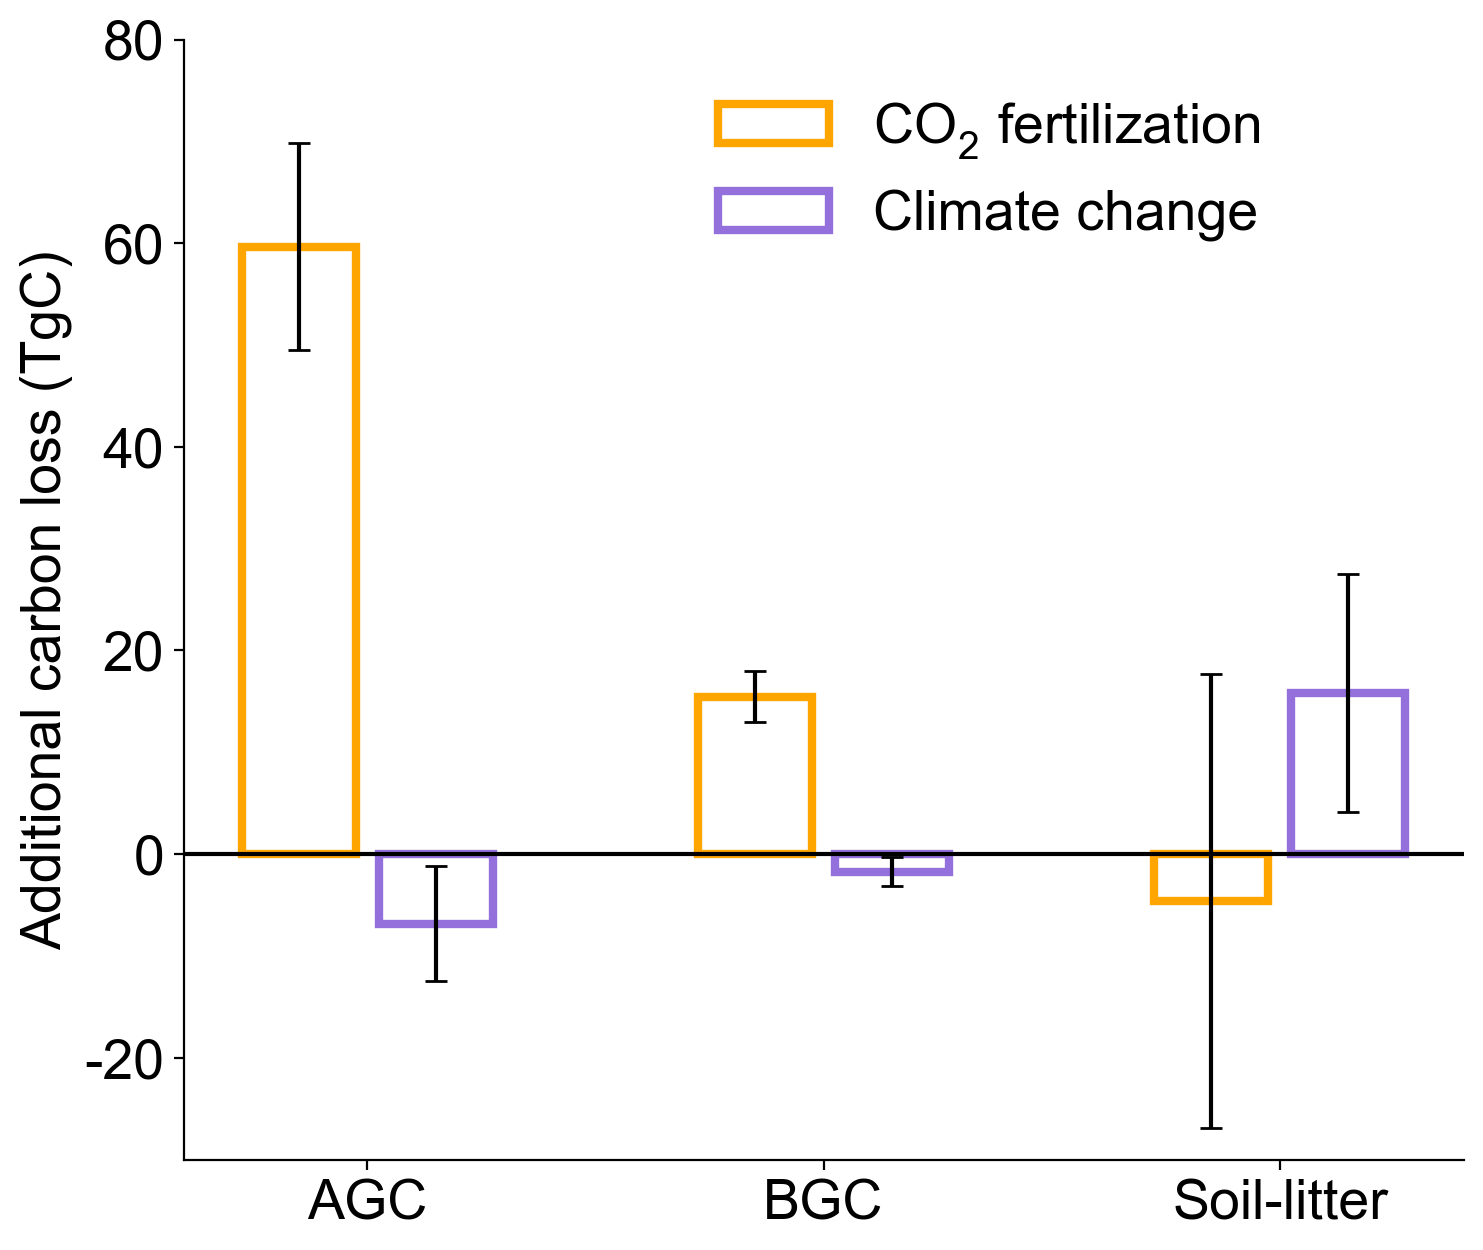

In [9]:
fig = plt.figure(figsize=(8,8)) ##width, height default(8,6)
fig.subplots_adjust(wspace=0.45,hspace=0.3, right=0.9,left = 0.1,bottom =0.2,top=0.9)
ax = fig.add_subplot(1,1,1)
xx = np.arange(0,3,1)
ax.bar(xx,degradation_pool_co2[0,:],yerr = degradation_pool_co2[1,:],fc='white',edgecolor='orange',linewidth=3,alpha=1,width=0.25,capsize=4,label = 'CO$_2$ fertilization')
ax.bar(xx+0.3,degradation_pool_clim[0,:],yerr = degradation_pool_clim[1,:],fc='white',edgecolor='mediumpurple',linewidth=3,alpha=1,width=0.25,capsize=4,label = 'Climate change')
ax.set_xticks(xx+0.15)
ax.set_xticklabels(['AGC','BGC','Soil-litter'])
ax.axhline(0,c='black')
ax.set_ylabel('Additional carbon loss (TgC)')
ax.set_ylim(-30,80)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc=(0.4,0.8),frameon=False,ncol=1)#